In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("house_prices_dataset.csv")  # Reads the CSV file into a DataFrame


#### No missing values found as count of missing values in each column is zero.

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())  # Prints the count of missing values for each column

Location                         0
Size_sqft                        0
Bedrooms                         0
Bathrooms                        0
House_Age                        0
Garage                           0
Pool                             0
Distance_to_City_Center_miles    0
Price                            0
dtype: int64


#### Encoding Categorical variables
 Using LabelEncoder from sklearn library and then saving the trained label encoder for future testing using the API.

In [4]:

# Apply Label Encoding to categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

le = LabelEncoder()
df["Location"] = le.fit_transform(df["Location"])

# Save the trained LabelEncoder
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(le, file)

df

Index(['Location'], dtype='object')


,Location,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles,Price
0,0,1395,3,1,26,1,0,12.077516,7.257565e+05
1,1,1528,4,2,28,1,0,22.750817,7.264075e+05
2,2,2165,4,4,46,1,0,27.593580,1.050788e+06
3,1,1498,5,3,27,1,0,28.552394,7.240178e+05
4,1,1195,5,4,34,1,1,17.525116,7.342087e+05
...,...,...,...,...,...,...,...,...,...
495,3,4475,3,4,14,1,1,22.624345,1.917976e+06
496,2,3854,3,4,16,1,1,27.292740,1.643563e+06
497,3,2943,1,1,39,1,0,22.882102,1.270751e+06
498,3,2111,1,4,17,0,0,18.116082,1.127655e+06


In [25]:
correlation_matrix = df.corr()


<Axes: >

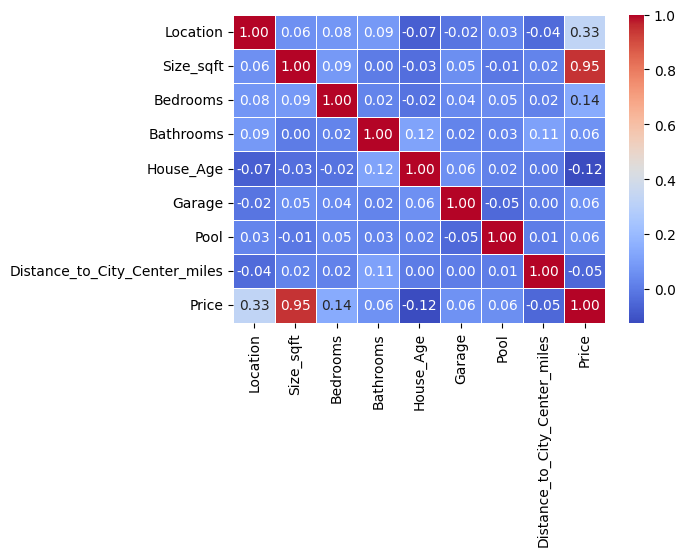

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

#### Outlier Detection 
Using isolation forest for outlier detection based on the correlation matrix

In [26]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(df, columns):
    # Initialize Isolation Forest model with 5% contamination (assumed proportion of outliers)
    model = IsolationForest(contamination=0.05, random_state=42)
    
    # Fit the model and predict outliers (-1 for outliers, 1 for inliers)
    df["outlier"] = model.fit_predict(df[columns])
    
    # Count the number of outliers detected
    outlier_count = (df["outlier"] == -1).sum()
    print(f"Number of outliers detected: {outlier_count}")
    
    # Return only the outlier rows
    return df[df["outlier"] == -1]

# **Example Usage**
outliers = detect_outliers_isolation_forest(df, ["Price", "Size_sqft", "Bedrooms"])

# Display all detected outliers
df[df["outlier"] == -1]

Number of outliers detected: 25


,Location,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles,Price,outlier
5,4,4971,2,2,7,0,0,11.035074,2.113373e+06,-1
71,1,933,3,2,49,1,0,0.543478,5.558926e+05,-1
75,4,4975,4,3,34,1,1,20.059892,2.134823e+06,-1
97,4,4985,3,1,6,1,0,17.721297,2.108269e+06,-1
113,2,809,1,4,41,1,0,14.120626,6.465481e+05,-1
122,1,4725,1,1,35,1,0,10.400508,1.674716e+06,-1
126,1,1310,1,1,32,0,0,21.948174,5.731515e+05,-1
137,4,4946,3,1,31,1,0,0.836831,2.078316e+06,-1
147,2,4762,1,3,5,1,1,15.391470,1.959680e+06,-1
158,3,4781,1,2,7,0,1,9.056343,1.980130e+06,-1


### House Price distribition
Using a histogram to show the number of houses based on their prices 

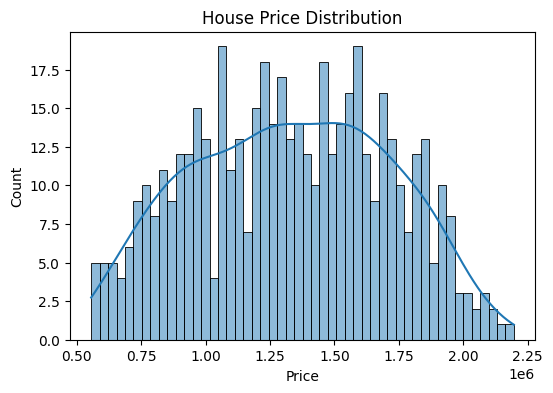

In [8]:
# Price Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

### Scatter Plot
Scatter plot showing the correlation between house prices and size of the house 

Text(0, 0.5, 'house price')

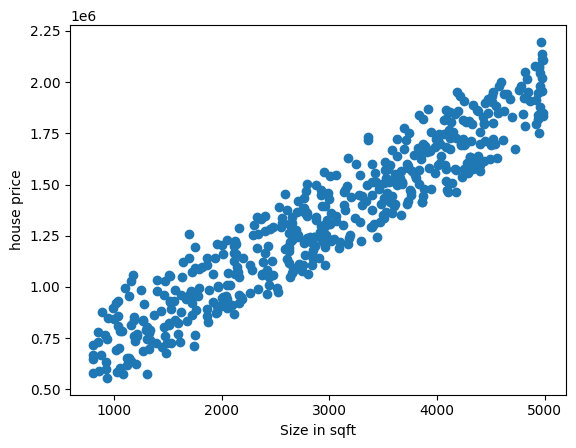

In [9]:
plt.scatter(df["Size_sqft"],df["Price"])
plt.xlabel("Size in sqft")
plt.ylabel("house price")

## Data preparation
Preparation of testing and training dataset and separating the dependent and independent variables.

In [27]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Price'])  # Replace 'SalePrice' with your target column name
y = df['Price']

In [28]:
from sklearn.model_selection import train_test_split
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

## Training a Decision Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # Limit depth to prevent overfitting
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

Preferred Linear Regression because of low MSE and high $R^2$ score which means that the linear model is justifying the variance in a better way.

## Model Evaluation 
Usage of RMSE, MAE, $R^2$ score

In [ ]:

# --- Linear Regression Evaluation ---
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5  # RMSE
mae_lr = mean_absolute_error(y_test, y_pred_lr)          # MAE
r2_lr  = r2_score(y_test, y_pred_lr)                     # R² Score

print("Linear Regression Metrics:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# --- Decision Tree Evaluation ---
rmse_dt = mean_squared_error(y_test, y_pred_dt) ** 0.5  # RMSE
mae_dt = mean_absolute_error(y_test, y_pred_dt)          # MAE
r2_dt  = r2_score(y_test, y_pred_dt)                     # R² Score

print("\nDecision Tree Metrics:")
print(f"RMSE: {rmse_dt:.2f}")
print(f"MAE: {mae_dt:.2f}")
print(f"R²: {r2_dt:.2f}")

Linear Regression Metrics:
RMSE: 39797.35
MAE: 31989.14
R²: 0.99

Decision Tree Metrics:
RMSE: 92668.05
MAE: 74586.76
R²: 0.94


# Analysis of Model Performance and Comparision
## Linear Regression
### Performance Insights

- **High R² (0.99):**  
  The model explains 99% of the variance in house prices, indicating an excellent fit.

- **Low Error Metrics:**  
  Both RMSE (0.11) and MAE (0.08) are very low, meaning the predictions are very close to the actual values.

---

### Limitations

- **Assumption of Linearity:**  
  Linear Regression assumes that relationships between features and the target variable are linear. If the true relationship is non-linear, the model might not capture all nuances.

- **Sensitivity to Outliers:**  
  The model can be heavily influenced by outliers, which might skew the results if not properly handled.

- **Potential Data Leakage:**  
  An extremely high R² score might sometimes signal data leakage or overfitting, especially if features inadvertently include information that would not be available in a real-world prediction scenario.

## Decision Tree
### Performance Insights

- **High R² (0.94):**  
  Although slightly lower than Linear Regression, a 0.94 score still indicates that the model explains a significant portion of the variance in house prices.

- **Moderate Error Metrics:**  
  RMSE (0.25) and MAE (0.20) are higher than those for Linear Regression, meaning the predictions are less accurate on average compared to the Linear model.

---

### Limitations

- **Overfitting Risk:**  
  Decision Trees are prone to overfitting, especially if they are deep or not properly pruned. Overfitting can reduce the model's ability to generalize to new, unseen data.

- **High Variance:**  
  Small changes in the training data can lead to very different tree structures, which might result in less stable predictions.

- **Interpretability vs. Complexity:**  
  While decision trees are generally interpretable, complex trees (or ensembles built from trees) can lose that clarity, making them harder to explain.


In [31]:
# **Save the Trained Linear Regression Model**
with open("house_price_model.pkl", "wb") as file:
    pickle.dump(lr_model, file)  # Serialize and save the trained model to a file

# **Save the Trained Scaler (StandardScaler)**
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)  # Serialize and save the fitted scaler for future use

# House Price Prediction: Model Evaluation Report  

## Introduction  
This project aims to predict house prices using machine learning models. We evaluated **Linear Regression** and **Decision Tree Regression** to determine which model provides the best performance.  

---

## Data Insights  
- **No Missing Values**: The dataset is clean, with no missing (`NaN`) values.  
- **High Correlation**: A strong correlation exists between **area (sqft)** and **price**, indicating that area is a key predictor of house price.  

---

## Model Performance Comparison  

| Metric      | Linear Regression | Decision Tree |
|------------|------------------|--------------|
| **RMSE** (Lower is better) | **39,797.35** | 92,668.05 |
| **MAE** (Lower is better)  | **31,989.14** | 74,586.76 |
| **R² Score** (Closer to 1 is better) | **0.99** | 0.94 |

---

## Key Findings  
- **Linear Regression Outperforms Decision Tree**  
  - **Lower RMSE & MAE**: Linear Regression has significantly lower errors, indicating more accurate predictions.  
  - **Higher R² Score**: Linear Regression explains **99%** of the variance in house prices, compared to **94%** for the Decision Tree model.  

- **Decision Tree Regression Exhibits Higher Variability**  
  - The Decision Tree model has a substantially higher RMSE and MAE, suggesting potential **overfitting** or **sensitivity to variations** in the dataset.  

---

## Conclusion & Next Steps  
- **Final Model Selection**: Based on the evaluation metrics, **Linear Regression** is the most suitable model for this dataset.  
- **Next Steps**:  
  - Deploy the trained model using **Flask or Django** to provide real-time price predictions.  
  - Explore **feature engineering** to improve model performance further.  
  - Investigate alternative models, such as **ensemble methods (e.g., Random Forest, XGBoost)**, to determine if they offer additional improvements.  

---

## Project Artifacts  
- Trained Model: `house_price_model.pkl`  
- Scaler: `scaler.pkl`  

